In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 140
from slider import Preprocessing, Analyze, ImageAnalysis, CommunityAnalysis, Visualization
from slider import PredictionSample

In [2]:
photoelasticImageData, whiteLightImageData, forceData, trackingData, metadata = Preprocessing.loadSliderData(loadCachedData=True)
peakIndices = Preprocessing.identifyPeaks(forceData)
timeArr = [forceData[0][:,1]]

Reading tracking data from cache: Cache/Tracking/shape0_01.pickle


In [3]:
metrics = [ImageAnalysis.varianceBrightness, ImageAnalysis.averageBrightness, CommunityAnalysis.averageCommunitySize, CommunityAnalysis.numberOfCommunities]

metricList = Analyze.analyze(photoelasticImageData, trackingData, metrics, metadata)

Reading analysis result from cache: Cache/Analysis/shape_01_numberOfCommunities_21997.pickle
Reading analysis result from cache: Cache/Analysis/shape_01_averageCommunitySize_21997.pickle
Reading analysis result from cache: Cache/Analysis/shape_01_averageBrightness_21997.pickle
Reading analysis result from cache: Cache/Analysis/shape_01_varianceBrightness_21997.pickle


In [4]:
inputArr, outputArr = PredictionSample.predictionSample(metricList, peakIndices, timeArr=timeArr, desiredOutcome=None, downsampleFactor=2)
print(np.shape(inputArr))
print(np.shape(outputArr))

(62, 5, 20)
(62,)


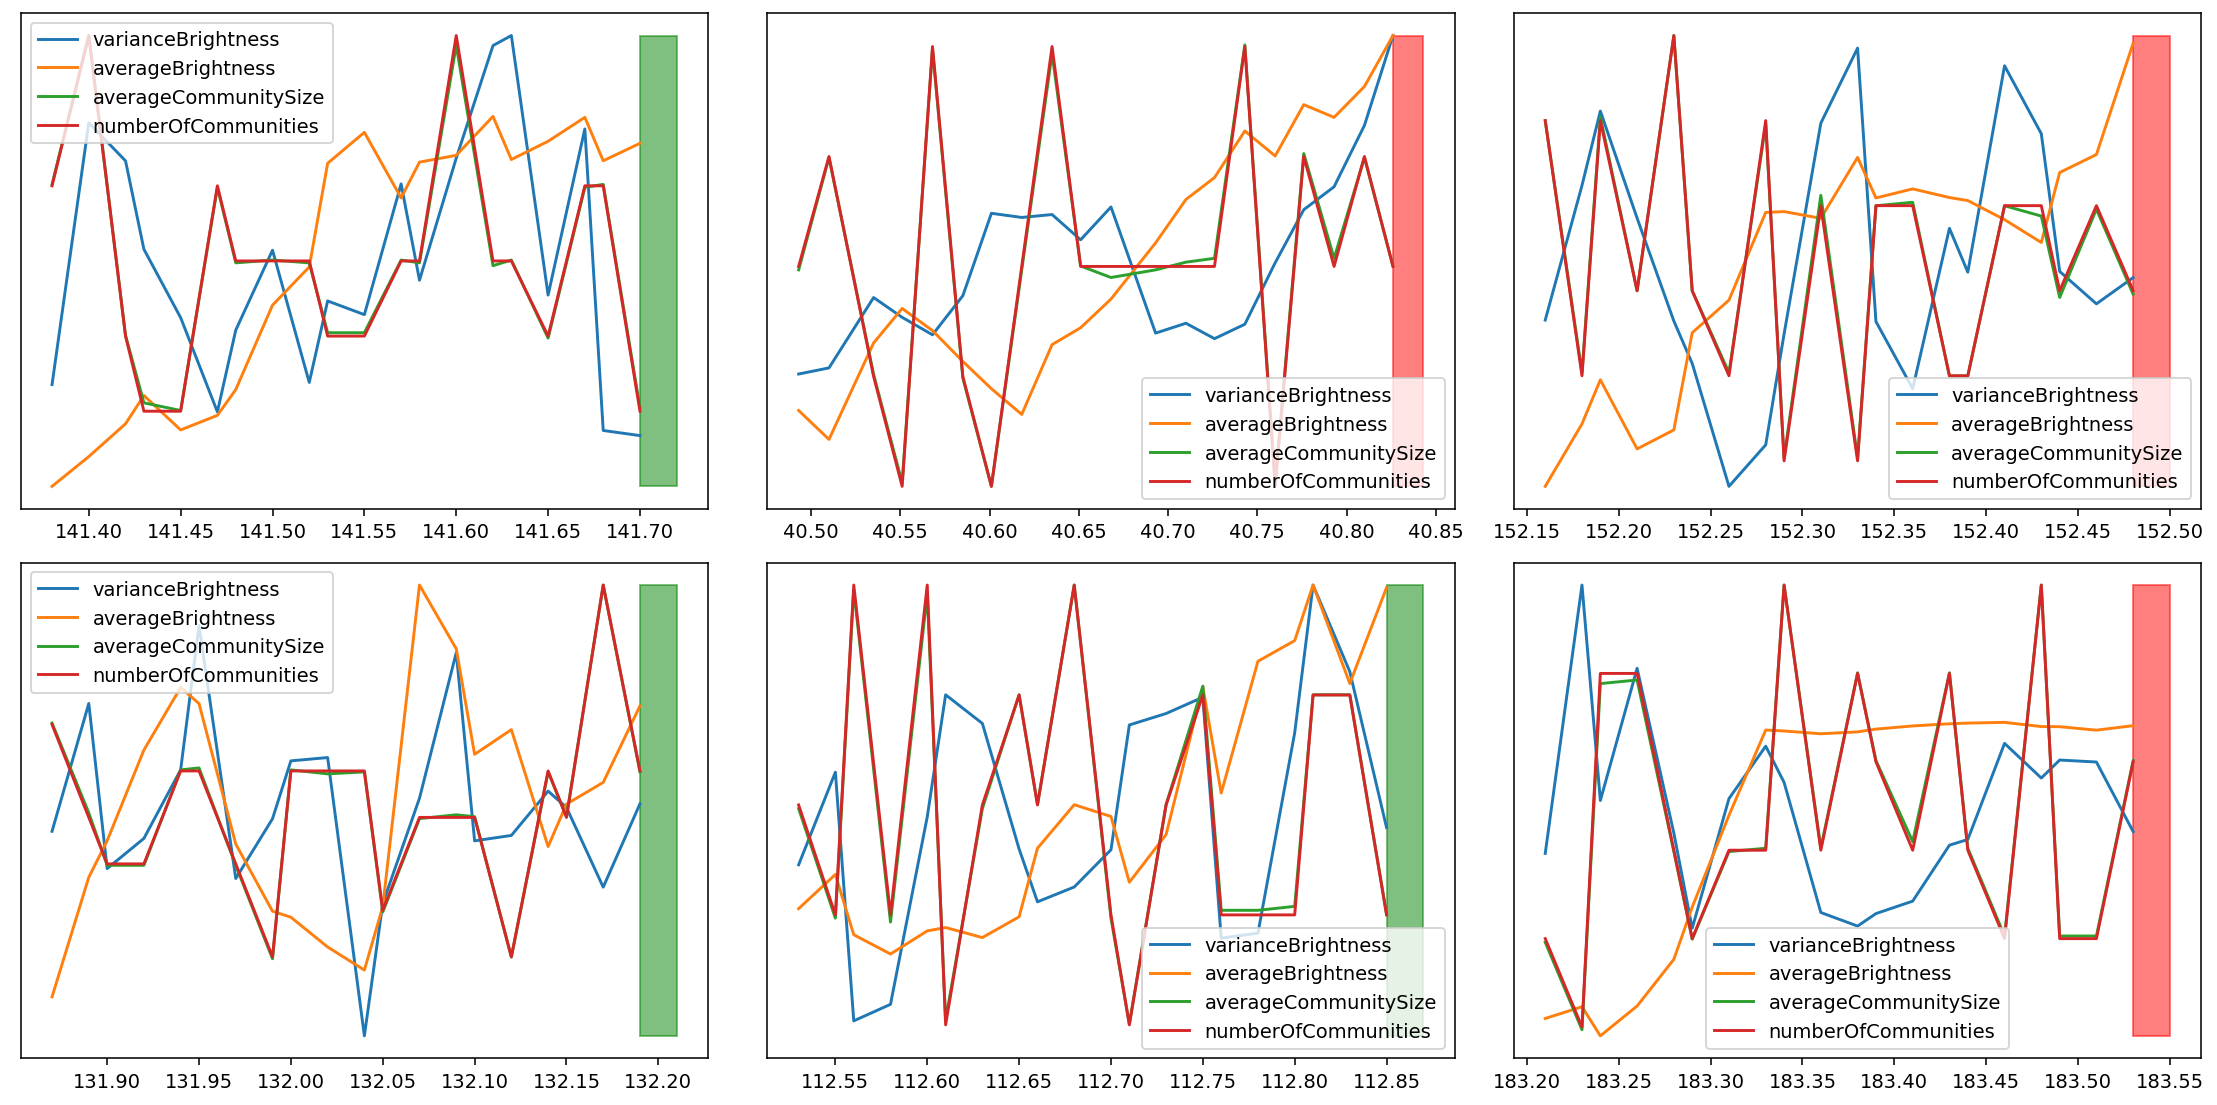

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))

for i in range(6):
    Visualization.visualizePredictionSample(inputArr[i], outputArr[i], ax=ax[int(i/3),i%3], metricList=metrics)

fig.tight_layout()
plt.show()